# Colorado Wildfires: Influences, Impacts and Predictive Analysis

### Comprehensive Analysis of the factors that impact and influence wildfires in the State of Colorado. 
This report will work to explore the risks of wildland fires in The State of Colorado while searching to uncover the risk factors that have lead to the most devestating fires in the states history, along with other avoidable factors that can help reduce the future potential risk of fires in the state and make predictive forecasts based on future predictive risks of wildfires based on a variety of factors. 

As this particular project is a portfolio piece, I'll be leaving in all cells to show the workflow of the entire project. In a separate project, I'll provide my updated, cleaned and professional update for the finalized notebook. 

In [6]:
import pandas as pd

chunk_size = 1000
for chunk in pd.read_csv("F:\\Wildfire Data Analysis\\CSV Attribute Table Exports\\USGS_Wildland_Fire_Combined_Dataset.csv", 
                         chunksize=chunk_size, 
                         low_memory=False, 
                         on_bad_lines='skip'):
    print(chunk.head())  # Process or inspect each chunk
    break  # Stop after first chunk for testing

   OID_  USGS_Assigned_ID Assigned_Fire_Type  Fire_Year  Fire_Polygon_Tier  \
0     1                 1           Wildfire       1860                  1   
1     2                 2           Wildfire       1860                  1   
2     3                 3           Wildfire       1860                  1   
3     4                 4           Wildfire       1870                  1   
4     5                 5           Wildfire       1870                  1   

  Fire_Attribute_Tiers     GIS_Acres  GIS_Hectares  \
0                1 (1)   3940.207089   1594.545237   
1                1 (1)    772.518249    312.627044   
2                1 (1)    333.020409    134.768578   
3         1 (1), 3 (1)  22294.993577   9022.463795   
4         1 (1), 3 (1)     36.985574     14.967531   

                                     Source_Datasets  \
0  Comb_National_NIFC_Interagency_Fire_Perimeter_...   
1  Comb_National_NIFC_Interagency_Fire_Perimeter_...   
2  Comb_National_NIFC_Interagency_Fire

In [8]:
#Problematic dataset with some corrupted cells due to varied delimiters. Adjusting import method. 

import csv

input_file = "F:\\Wildfire Data Analysis\\CSV Attribute Table Exports\\USGS_Wildland_Fire_Combined_Dataset.csv"
output_file = "F:\\Wildfire Data Analysis\\CSV Attribute Table Exports\\cleaned_dataset.csv"

with open(input_file, 'r', encoding='latin1') as infile, open(output_file, 'w', encoding='utf-8', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for row in reader:
        try:
            writer.writerow(row)  # Write valid rows
        except:
            continue  # Skip problematic rows

# Try reading the cleaned file
df = pd.read_csv(output_file, low_memory=False)
df.head(10)

,ï»¿OID_,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,...,Processing_Notes,Wildfire_Notice,Prescribed_Burn_Notice,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area
0,1,1,Wildfire,1860,1.0,1 (1),3940.207089,1594.545237,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.047590,NaN,No,64888.449849,1.594545e+07
1,2,2,Wildfire,1860,1.0,1 (1),772.518249,312.627044,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.071367,NaN,No,23462.288613,3.126270e+06
2,3,3,Wildfire,1860,1.0,1 (1),333.020409,134.768578,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.379578,NaN,No,6679.573569,1.347686e+06
3,4,4,Wildfire,1870,1.0,"1 (1), 3 (1)",22294.993577,9022.463795,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (1)",...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.158038,NaN,No,84700.719226,9.022464e+07
4,5,5,Wildfire,1870,1.0,"1 (1), 3 (1)",36.985574,14.967531,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (1)",...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.218009,NaN,No,2937.265383,1.496753e+05
5,6,6,Wildfire,1878,1.0,"1 (2), 3 (3)",59468.869291,24066.197562,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (4), Likely Wildfire (1)",...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.386654,NaN,No,88439.705867,2.406620e+08
6,7,7,Wildfire,1878,1.0,"1 (2), 3 (4)",39187.076879,15858.447374,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (3), Likely Wildfire (3)",...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.328137,NaN,No,77930.503190,1.585845e+08
7,8,8,Wildfire,1880,1.0,"1 (1), 3 (2)",16781.535449,6791.246451,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (1)",...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.149313,NaN,No,75601.667494,6.791246e+07
8,9,9,Wildfire,1880,1.0,"1 (1), 3 (1)",14946.172721,6048.501507,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (2),...,NaN,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.183134,NaN,No,64423.416282,6.048502e+07
9,10,10,Wildfire,1880,1.0,"1 (1), 3 (1)",3115.787359,1260.914408,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (2),...,deleted suspicious ignition date 2/22/1905 (1),Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,NaN,NaN,0.583833,NaN,No,16474.164949,1.260914e+07


In [10]:
print(df.columns)

Index(['ï»¿OID_', 'USGS_Assigned_ID', 'Assigned_Fire_Type', 'Fire_Year',
       'Fire_Polygon_Tier', 'Fire_Attribute_Tiers', 'GIS_Acres',
       'GIS_Hectares', 'Source_Datasets', 'Listed_Fire_Types',
       'Listed_Fire_Names', 'Listed_Fire_Codes', 'Listed_Fire_IDs',
       'Listed_Fire_IRWIN_IDs', 'Listed_Fire_Dates', 'Listed_Fire_Causes',
       'Listed_Fire_Cause_Class', 'Listed_Rx_Reported_Acres',
       'Listed_Map_Digitize_Methods', 'Listed_Notes', 'Processing_Notes',
       'Wildfire_Notice', 'Prescribed_Burn_Notice', 'Wildfire_and_Rx_Flag',
       'Overlap_Within_1_or_2_Flag', 'Circleness_Scale', 'Circle_Flag',
       'Exclude_From_Summary_Rasters', 'Shape_Length', 'Shape_Area'],
      dtype='object')


In [20]:
#dropping columns that we do not need for this analysis. 
columns_to_drop = ['ï»¿OID_', 'USGS_Assigned_ID', 'Fire_Polygon_Tier', 'Fire_Attribute_Tiers', 'Source_Datasets', 'Listed_Fire_Codes', 'Listed_Fire_IDs',
    'Listed_Fire_IRWIN_IDs', 'Listed_Fire_Cause_Class', 'Listed_Rx_Reported_Acres', 'Listed_Map_Digitize_Methods', 'Listed_Notes', 'Processing_Notes',
    'Wildfire_and_Rx_Flag', 'Overlap_Within_1_or_2_Flag', 'Circleness_Scale', 'Circle_Flag',
    'Exclude_From_Summary_Rasters', 'Shape_Length', 'Shape_Area', 'Wildfire_Notice', 'Listed_Fire_Dates']

df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()

,Assigned_Fire_Type,Fire_Year,GIS_Acres,GIS_Hectares,Listed_Fire_Types,Listed_Fire_Names,Listed_Fire_Causes,Prescribed_Burn_Notice
0,Wildfire,1860,3940,1595,Wildfire (1),Big Quilcene River (1),NaN,Prescribed fire data in this dataset represent...
1,Wildfire,1860,773,313,Wildfire (1),Harrison Lake (1),NaN,Prescribed fire data in this dataset represent...
2,Wildfire,1860,333,135,Wildfire (1),Tunnel Creek (1),NaN,Prescribed fire data in this dataset represent...
3,Wildfire,1870,22295,9022,"Wildfire (1), Likely Wildfire (1)",1870 (2),NaN,Prescribed fire data in this dataset represent...
4,Wildfire,1870,37,15,"Wildfire (1), Likely Wildfire (1)",No Fire Name Provided (2),NaN,Prescribed fire data in this dataset represent...


In [21]:
# Fill non-finite values (NaN, inf, -inf) with 0, round, and convert to int
df['GIS_Acres'] = df['GIS_Acres'].fillna(0).replace([float('inf'), -float('inf')], 0).round().astype(int)
df['GIS_Hectares'] = df['GIS_Hectares'].fillna(0).replace([float('inf'), -float('inf')], 0).round().astype(int)

# Verify the changes
print(df[['GIS_Acres', 'GIS_Hectares']].head())
print(df[['GIS_Acres', 'GIS_Hectares']].dtypes)

   GIS_Acres  GIS_Hectares
0       3940          1595
1        773           313
2        333           135
3      22295          9022
4         37            15
GIS_Acres       int64
GIS_Hectares    int64
dtype: object


In [22]:
df.head()

,Assigned_Fire_Type,Fire_Year,GIS_Acres,GIS_Hectares,Listed_Fire_Types,Listed_Fire_Names,Listed_Fire_Causes,Prescribed_Burn_Notice
0,Wildfire,1860,3940,1595,Wildfire (1),Big Quilcene River (1),NaN,Prescribed fire data in this dataset represent...
1,Wildfire,1860,773,313,Wildfire (1),Harrison Lake (1),NaN,Prescribed fire data in this dataset represent...
2,Wildfire,1860,333,135,Wildfire (1),Tunnel Creek (1),NaN,Prescribed fire data in this dataset represent...
3,Wildfire,1870,22295,9022,"Wildfire (1), Likely Wildfire (1)",1870 (2),NaN,Prescribed fire data in this dataset represent...
4,Wildfire,1870,37,15,"Wildfire (1), Likely Wildfire (1)",No Fire Name Provided (2),NaN,Prescribed fire data in this dataset represent...


In [19]:
df.tail()

,Assigned_Fire_Type,Fire_Year,GIS_Acres,GIS_Hectares,Listed_Fire_Types,Listed_Fire_Names,Listed_Fire_Dates,Listed_Fire_Causes,Prescribed_Burn_Notice
135067,Prescribed Fire,2020,16,7,Prescribed Fire (3),WEW CA Broadcast (3),Listed Prescribed Fire End Date(s): 2020-01-01...,Human (3),Prescribed fire data in this dataset represent...
135068,Prescribed Fire,2020,7,3,Prescribed Fire (1),2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Listed Prescribed Fire End Date(s): 2020-05-16...,Human (1),Prescribed fire data in this dataset represent...
135069,Prescribed Fire,2020,9,4,Prescribed Fire (4),2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Listed Prescribed Fire End Date(s): 2020-05-16...,Human (4),Prescribed fire data in this dataset represent...
135070,Prescribed Fire,2020,1,0,Prescribed Fire (1),2_WUI_Chicken Rx (1),Listed Prescribed Fire Start Date(s): 2020-07-...,Human (1),Prescribed fire data in this dataset represent...
135071,Prescribed Fire,2020,1,0,Prescribed Fire (1),Oak Basin (1),Listed Prescribed Fire End Date(s): 2020-01-01...,Human (1),Prescribed fire data in this dataset represent...


In [24]:
# Convert Fire_Year to numeric, coercing invalid values to NaN
df['Fire_Year'] = pd.to_numeric(df['Fire_Year'], errors='coerce')

# Optionally, drop rows with NaN in Fire_Year (if invalid values exist)
df = df[df['Fire_Year'].notna()]

# Convert to integer to ensure whole numbers
df['Fire_Year'] = df['Fire_Year'].astype(int)

# Filter rows where Fire_Year is between 1950 and 2020
df = df[(df['Fire_Year'] >= 1950) & (df['Fire_Year'] <= 2020)]

# Verify the filtered DataFrame
print(df['Fire_Year'].describe())  # Summary statistics for Fire_Year
print(df['Fire_Year'].dtype)      # Confirm data type
print(df.head())                  # Show first few rows

count    122614.000000
mean       2000.836886
std          16.461114
min        1950.000000
25%        1991.000000
50%        2006.000000
75%        2014.000000
max        2020.000000
Name: Fire_Year, dtype: float64
int64
     Assigned_Fire_Type  Fire_Year  GIS_Acres  GIS_Hectares  \
9743           Wildfire       1950    1366773        553113   
9744           Wildfire       1950     608614        246297   
9745           Wildfire       1950     600996        243214   
9746           Wildfire       1950     153868         62268   
9747           Wildfire       1950      64910         26268   

                       Listed_Fire_Types  \
9743   Wildfire (2), Likely Wildfire (1)   
9744   Wildfire (2), Likely Wildfire (1)   
9745   Wildfire (2), Likely Wildfire (1)   
9746   Wildfire (2), Likely Wildfire (1)   
9747  Wildfire (11), Likely Wildfire (3)   

                                      Listed_Fire_Names  \
9743                             Little Black River (3)   
9744            

In [25]:
# Replace NaN in Listed_Fire_Causes with "Unknown"
df['Listed_Fire_Causes'] = df['Listed_Fire_Causes'].fillna('Unknown')

# Verify the changes
print(df['Listed_Fire_Causes'].isna().sum())  # Should be 0 if all NaN are replaced
print(df['Listed_Fire_Causes'].value_counts())  # Show distribution of values
print(df[['Listed_Fire_Causes']].head())  # Show first few rows

0
Listed_Fire_Causes
Unknown                                                 35197
Human (1)                                               23716
Human (2)                                                8619
Natural (1)                                              6715
Unknown (1)                                              5438
                                                        ...  
5 - Debris (1), 7 - Arson (2), 9 - Miscellaneous (1)        1
Unknown (2), 9 - Miscellaneous (1)                          1
Unknown (4), Human (11)                                     1
Unknown (2), Human (16)                                     1
Human (49)                                                  1
Name: count, Length: 1852, dtype: int64
                                     Listed_Fire_Causes
9743                                            Unknown
9744                                            Unknown
9745                                            Unknown
9746                             

In [26]:
df.head()

,Assigned_Fire_Type,Fire_Year,GIS_Acres,GIS_Hectares,Listed_Fire_Types,Listed_Fire_Names,Listed_Fire_Causes,Prescribed_Burn_Notice
9743,Wildfire,1950,1366773,553113,"Wildfire (2), Likely Wildfire (1)",Little Black River (3),Unknown,Prescribed fire data in this dataset represent...
9744,Wildfire,1950,608614,246297,"Wildfire (2), Likely Wildfire (1)",Schuman House - Porcupine Rr. (3),Unknown,Prescribed fire data in this dataset represent...
9745,Wildfire,1950,600996,243214,"Wildfire (2), Likely Wildfire (1)",Venetie (3),Unknown,Prescribed fire data in this dataset represent...
9746,Wildfire,1950,153868,62268,"Wildfire (2), Likely Wildfire (1)",Sheenjek (3),Unknown,Prescribed fire data in this dataset represent...
9747,Wildfire,1950,64910,26268,"Wildfire (11), Likely Wildfire (3)","CONEJOS (5), BARRETT (5), No Fire Name Provide...","9 - Miscellaneous (2), 14 - Unknown / Unidenti...",Prescribed fire data in this dataset represent...


In [27]:
df.tail()

,Assigned_Fire_Type,Fire_Year,GIS_Acres,GIS_Hectares,Listed_Fire_Types,Listed_Fire_Names,Listed_Fire_Causes,Prescribed_Burn_Notice
135067,Prescribed Fire,2020,16,7,Prescribed Fire (3),WEW CA Broadcast (3),Human (3),Prescribed fire data in this dataset represent...
135068,Prescribed Fire,2020,7,3,Prescribed Fire (1),2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Human (1),Prescribed fire data in this dataset represent...
135069,Prescribed Fire,2020,9,4,Prescribed Fire (4),2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Human (4),Prescribed fire data in this dataset represent...
135070,Prescribed Fire,2020,1,0,Prescribed Fire (1),2_WUI_Chicken Rx (1),Human (1),Prescribed fire data in this dataset represent...
135071,Prescribed Fire,2020,1,0,Prescribed Fire (1),Oak Basin (1),Human (1),Prescribed fire data in this dataset represent...


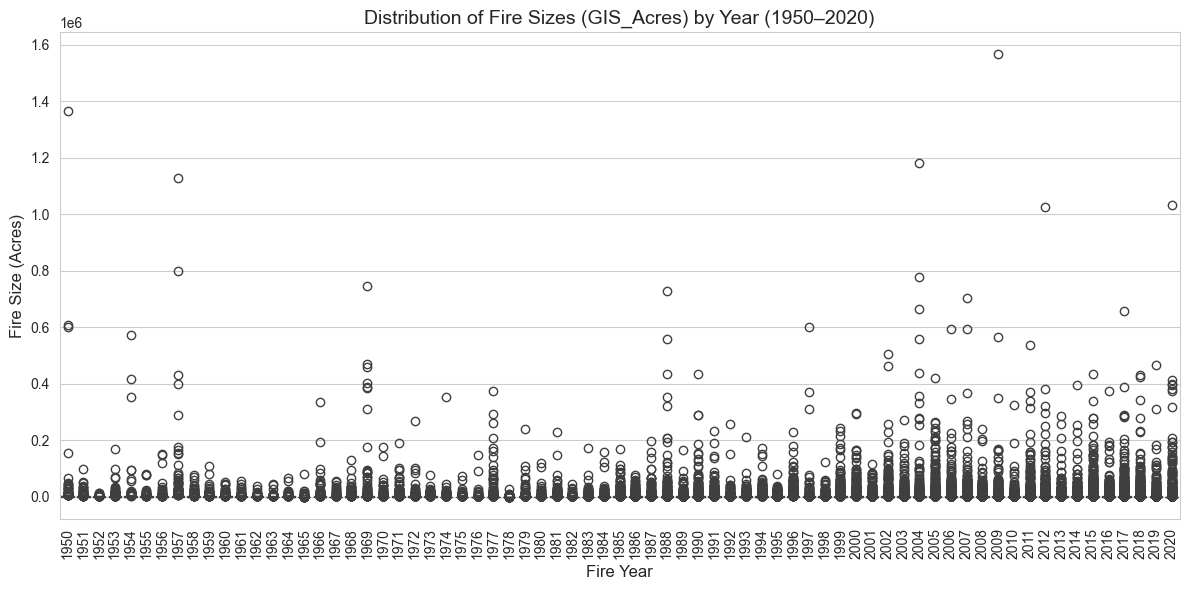

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set_style("whitegrid")

# Create a boxplot of GIS_Acres by Fire_Year
plt.figure(figsize=(12, 6))  # Set figure size
sns.boxplot(x='Fire_Year', y='GIS_Acres', data=df)

# Customize the plot
plt.title('Distribution of Fire Sizes (GIS_Acres) by Year (1950–2020)', fontsize=14)
plt.xlabel('Fire Year', fontsize=12)
plt.ylabel('Fire Size (Acres)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
print("Data type of GIS_Acres:", df['GIS_Acres'].dtype)

Data type of GIS_Acres: int64


In [31]:
# Check summary statistics for GIS_Acres
print(df['GIS_Acres'].describe())
print("Max GIS_Acres:", df['GIS_Acres'].max())
print("Min GIS_Acres:", df['GIS_Acres'].min())

count    1.226140e+05
mean     2.191427e+03
std      1.714563e+04
min      0.000000e+00
25%      1.300000e+01
50%      9.400000e+01
75%      7.747500e+02
max      1.566273e+06
Name: GIS_Acres, dtype: float64
Max GIS_Acres: 1566273
Min GIS_Acres: 0


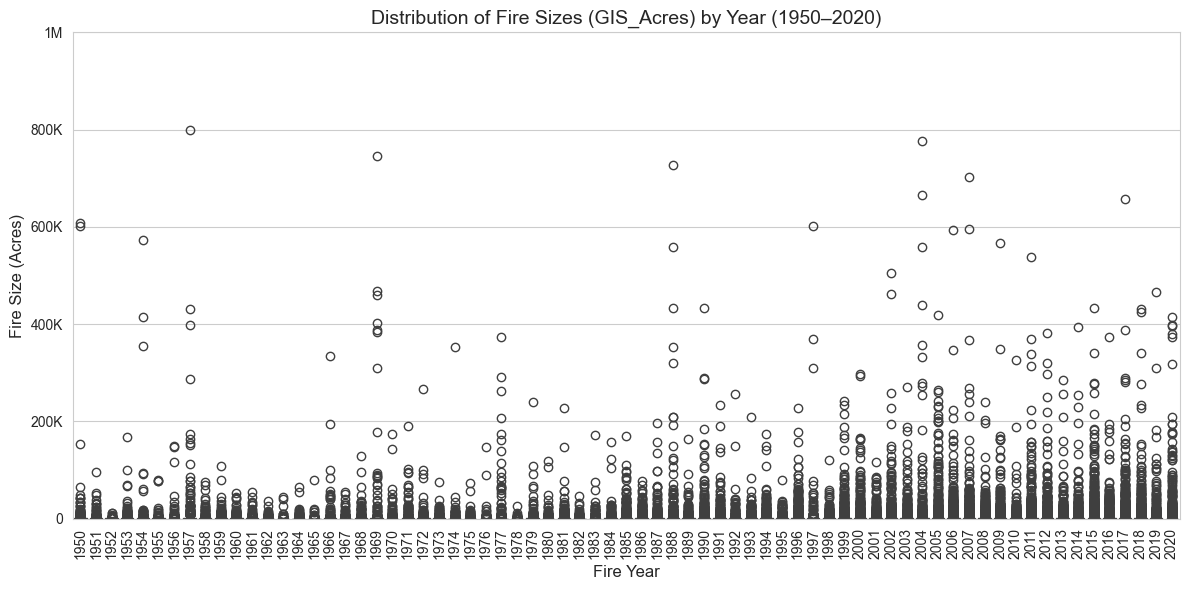

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fire_Year', y='GIS_Acres', data=df)

# Set y-axis range and ticks
plt.ylim(0, 1000000)  # Set y-axis from 0 to 1,000,000 acres
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], 
           ['0', '200K', '400K', '600K', '800K', '1M'])  # Custom tick labels

# Customize plot
plt.title('Distribution of Fire Sizes (GIS_Acres) by Year (1950–2020)', fontsize=14)
plt.xlabel('Fire Year', fontsize=12)
plt.ylabel('Fire Size (Acres)', fontsize=12)
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

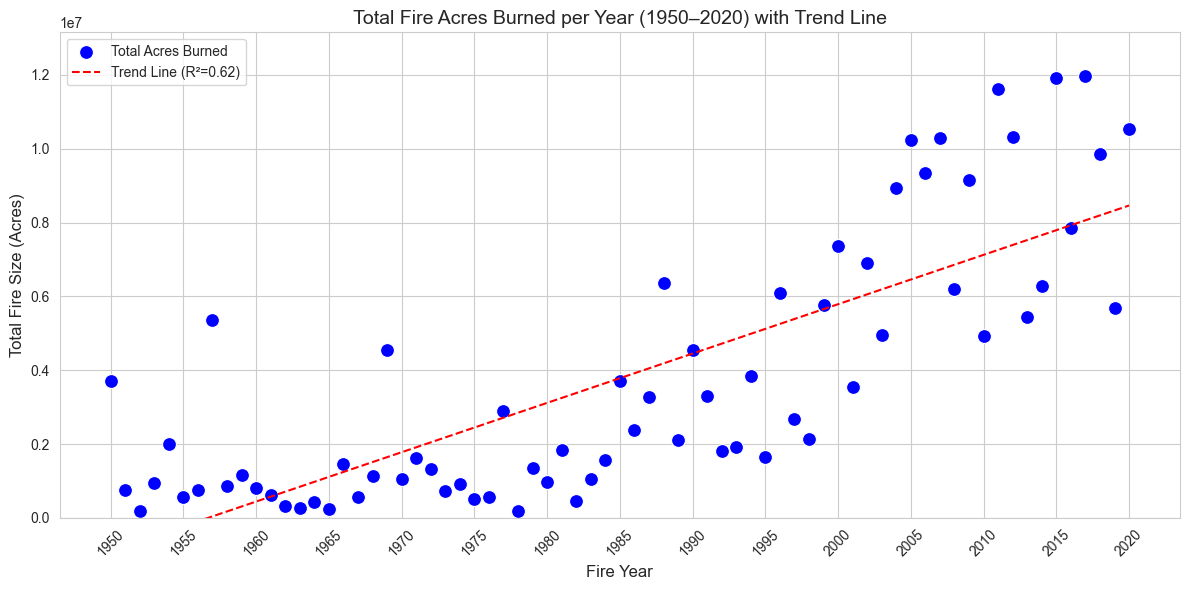

Slope: 133677.93 acres/year
R²: 0.62
P-value: 0.0000


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Aggregate total GIS_Acres by Fire_Year
yearly_data = df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fire_Year', y='GIS_Acres', data=yearly_data, s=100, color='blue', label='Total Acres Burned')

# Calculate and plot linear regression trend line
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Fire_Year'], yearly_data['GIS_Acres'])
trend_line = slope * yearly_data['Fire_Year'] + intercept
plt.plot(yearly_data['Fire_Year'], trend_line, color='red', linestyle='--', label=f'Trend Line (R²={r_value**2:.2f})')

# Customize plot
plt.title('Total Fire Acres Burned per Year (1950–2020) with Trend Line', fontsize=14)
plt.xlabel('Fire Year', fontsize=12)
plt.ylabel('Total Fire Size (Acres)', fontsize=12)
plt.ylim(0, yearly_data['GIS_Acres'].max() * 1.1)  # Add 10% headroom for y-axis
plt.xticks(rotation=45, ticks=range(1950, 2021, 5))  # Show every 5 years for clarity
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Print trend line statistics
print(f"Slope: {slope:.2f} acres/year")
print(f"R²: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

In [35]:
# Aggregate total GIS_Acres by Fire_Year
yearly_data = df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

# Check summary statistics
print("Yearly GIS_Acres Summary:")
print(yearly_data['GIS_Acres'].describe())
print("Max GIS_Acres (yearly sum):", yearly_data['GIS_Acres'].max())
print("Min GIS_Acres (yearly sum):", yearly_data['GIS_Acres'].min())
print(yearly_data.head(10))  # Show first 10 years

Yearly GIS_Acres Summary:
count    7.100000e+01
mean     3.784502e+06
std      3.507227e+06
min      1.791190e+05
25%      9.301780e+05
50%      2.138195e+06
75%      5.933416e+06
max      1.195900e+07
Name: GIS_Acres, dtype: float64
Max GIS_Acres (yearly sum): 11959002
Min GIS_Acres (yearly sum): 179119
   Fire_Year  GIS_Acres
0       1950    3710621
1       1951     757913
2       1952     179119
3       1953     934377
4       1954    2010099
5       1955     560843
6       1956     768957
7       1957    5367667
8       1958     858656
9       1959    1154041


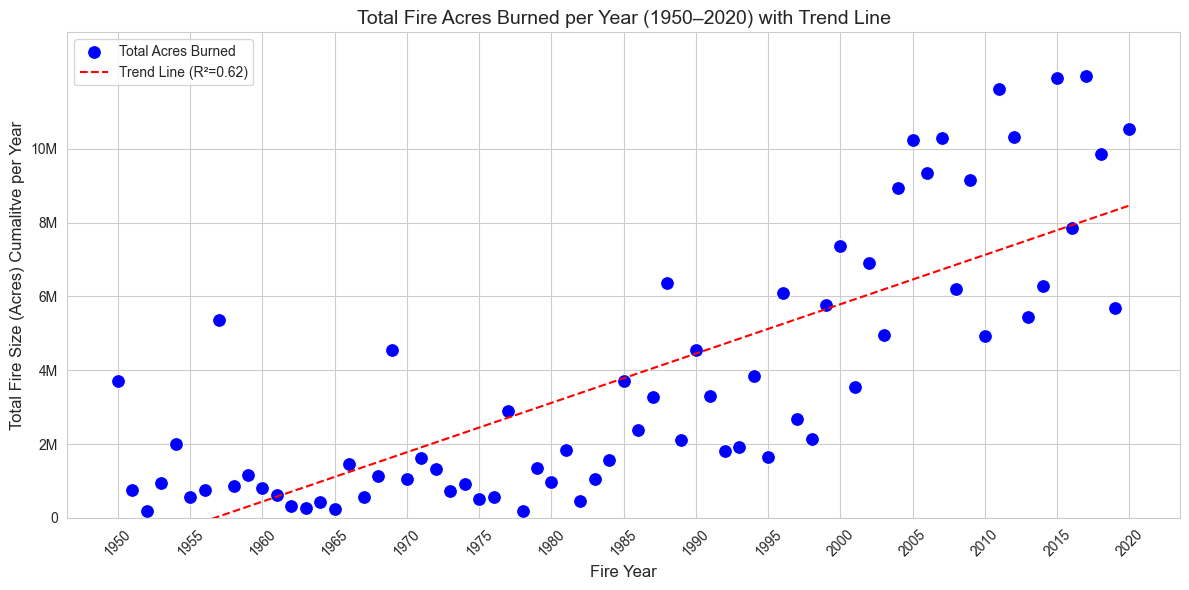

Slope: 133677.93 acres/year
R²: 0.62
P-value: 0.0000


In [37]:
# Aggregate total GIS_Acres by Fire_Year
yearly_data = df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fire_Year', y='GIS_Acres', data=yearly_data, s=100, color='blue', label='Total Acres Burned')

# Linear trend line
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Fire_Year'], yearly_data['GIS_Acres'])
trend_line = slope * yearly_data['Fire_Year'] + intercept
plt.plot(yearly_data['Fire_Year'], trend_line, color='red', linestyle='--', label=f'Trend Line (R²={r_value**2:.2f})')

# Set y-axis scale explicitly
max_acres = max(yearly_data['GIS_Acres'].max() * 1.1, 10000000)  # Use data max + 10% or 10M
plt.ylim(0, max_acres)
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000],
           ['0', '2M', '4M', '6M', '8M', '10M'])  # Custom ticks in millions

# Customize plot
plt.title('Total Fire Acres Burned per Year (1950–2020) with Trend Line', fontsize=14)
plt.xlabel('Fire Year', fontsize=12)
plt.ylabel('Total Fire Size (Acres) Cumalitve per Year', fontsize=12)
plt.xticks(rotation=45, ticks=range(1950, 2021, 5))  # Every 5 years
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Print trend line statistics
print(f"Slope: {slope:.2f} acres/year")
print(f"R²: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

Yearly GIS_Acres Summary (1985–2020):
count    3.600000e+01
mean     6.248807e+06
std      3.249649e+06
min      1.638089e+06
25%      3.480405e+06
50%      5.933416e+06
75%      9.196392e+06
max      1.195900e+07
Name: GIS_Acres, dtype: float64
Max GIS_Acres: 11959002
Min GIS_Acres: 1638089
    Fire_Year  GIS_Acres
35       1985    3711984
36       1986    2369966
37       1987    3286562
38       1988    6358878
39       1989    2101047
40       1990    4538099
41       1991    3295632
42       1992    1820563
43       1993    1924185
44       1994    3846020


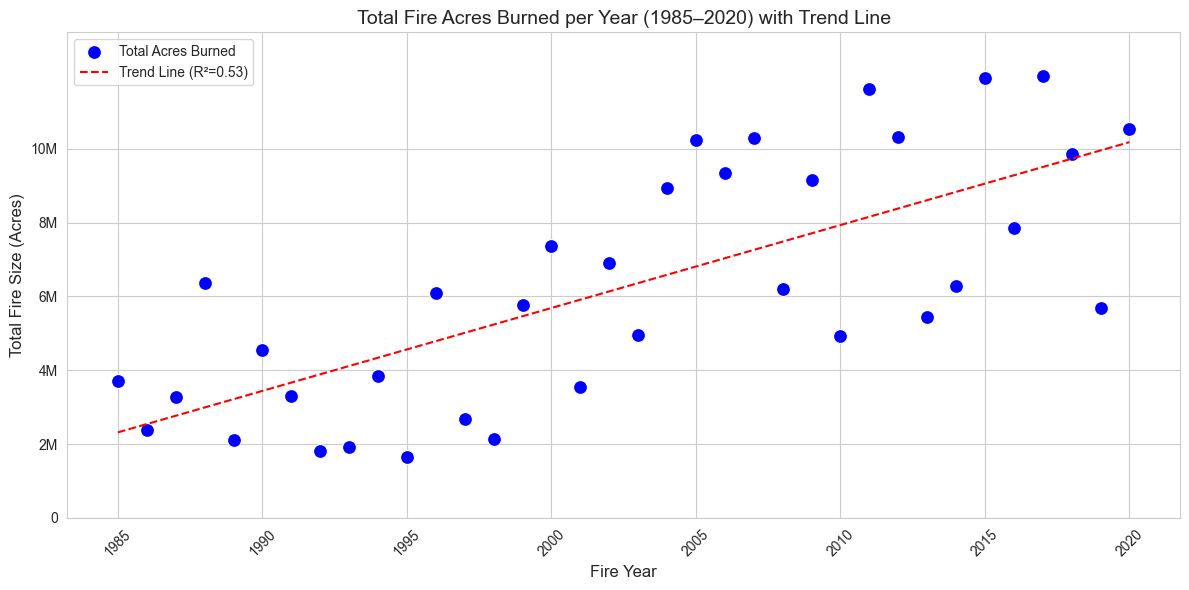

Slope: 224620.24 acres/year
R²: 0.53
P-value: 0.0000


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Aggregate total GIS_Acres by Fire_Year
yearly_data = df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

# Filter for 1985–2020
yearly_data = yearly_data[(yearly_data['Fire_Year'] >= 1985) & (yearly_data['Fire_Year'] <= 2020)]

# Verify the data
print("Yearly GIS_Acres Summary (1985–2020):")
print(yearly_data['GIS_Acres'].describe())
print("Max GIS_Acres:", yearly_data['GIS_Acres'].max())
print("Min GIS_Acres:", yearly_data['GIS_Acres'].min())
print(yearly_data.head(10))

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fire_Year', y='GIS_Acres', data=yearly_data, s=100, color='blue', label='Total Acres Burned')

# Linear trend line
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Fire_Year'], yearly_data['GIS_Acres'])
trend_line = slope * yearly_data['Fire_Year'] + intercept
plt.plot(yearly_data['Fire_Year'], trend_line, color='red', linestyle='--', label=f'Trend Line (R²={r_value**2:.2f})')

# Set y-axis scale
max_acres = max(yearly_data['GIS_Acres'].max() * 1.1, 10000000)  # Use data max + 10% or 10M
plt.ylim(0, max_acres)
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000],
           ['0', '2M', '4M', '6M', '8M', '10M'])

# Customize plot
plt.title('Total Fire Acres Burned per Year (1985–2020) with Trend Line', fontsize=14)
plt.xlabel('Fire Year', fontsize=12)
plt.ylabel('Total Fire Size (Acres)', fontsize=12)
plt.xticks(rotation=45, ticks=range(1985, 2021, 5))  # Every 5 years
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Print trend line statistics
print(f"Slope: {slope:.2f} acres/year")
print(f"R²: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

In [39]:
# Aggregate total GIS_Acres by Fire_Year (1985–2020)
yearly_data = df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()
yearly_data = yearly_data[(yearly_data['Fire_Year'] >= 1985) & (yearly_data['Fire_Year'] <= 2020)]

# Prepare features (X) and target (y)
X = yearly_data[['Fire_Year']].values  # Feature: Fire_Year
y = yearly_data['GIS_Acres'].values     # Target: Total GIS_Acres

# Verify data
print("Data Shape:", X.shape, y.shape)
print(yearly_data.head())
print("Max GIS_Acres:", yearly_data['GIS_Acres'].max())

Data Shape: (36, 1) (36,)
    Fire_Year  GIS_Acres
35       1985    3711984
36       1986    2369966
37       1987    3286562
38       1988    6358878
39       1989    2101047
Max GIS_Acres: 11959002


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

print("Linear Regression:")
print(f"R²: {lr_r2:.2f}")
print(f"MSE: {lr_mse:.2f}")

# --- Model 2: Polynomial Regression (Degree 2) ---
poly = PolynomialFeatures(degree=2)
polyreg = make_pipeline(poly, LinearRegression())
polyreg.fit(X_train, y_train)
poly_pred = polyreg.predict(X_test)
poly_r2 = r2_score(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)

print("\nPolynomial Regression (Degree 2):")
print(f"R²: {poly_r2:.2f}")
print(f"MSE: {poly_mse:.2f}")

# --- Model 3: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("\nRandom Forest Regressor:")
print(f"R²: {rf_r2:.2f}")
print(f"MSE: {rf_mse:.2f}")

Linear Regression:
R²: 0.53
MSE: 6821904824520.57

Polynomial Regression (Degree 2):
R²: 0.48
MSE: 7636834097475.82

Random Forest Regressor:
R²: 0.15
MSE: 12486842031163.62


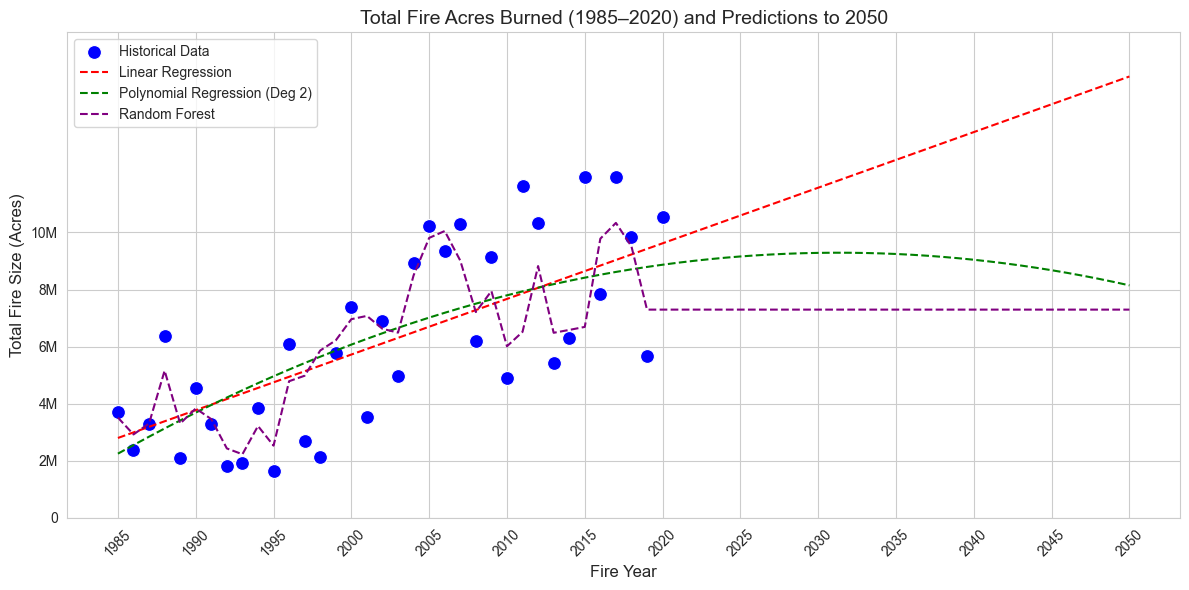

Predictions for 2030, 2040, 2050:
    Year   Linear_Pred     Poly_Pred    RF_Pred
45  2030  1.156679e+07  9.283677e+06  7296053.7
55  2040  1.351487e+07  9.042779e+06  7296053.7
65  2050  1.546296e+07  8.145953e+06  7296053.7


In [41]:
# Create future years for prediction (2021–2050)
future_years = np.array(range(2021, 2051)).reshape(-1, 1)
all_years = np.vstack([X, future_years])  # Combine historical and future years

# Predictions for all years
lr_future_pred = lr_model.predict(all_years)
poly_future_pred = polyreg.predict(all_years)
rf_future_pred = rf_model.predict(all_years)

# Plot historical data and predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fire_Year', y='GIS_Acres', data=yearly_data, s=100, color='blue', label='Historical Data')

# Plot predictions
plt.plot(all_years, lr_future_pred, color='red', linestyle='--', label='Linear Regression')
plt.plot(all_years, poly_future_pred, color='green', linestyle='--', label='Polynomial Regression (Deg 2)')
plt.plot(all_years, rf_future_pred, color='purple', linestyle='--', label='Random Forest')

# Customize plot
plt.title('Total Fire Acres Burned (1985–2020) and Predictions to 2050', fontsize=14)
plt.xlabel('Fire Year', fontsize=12)
plt.ylabel('Total Fire Size (Acres)', fontsize=12)
plt.ylim(0, max(y.max(), lr_future_pred.max(), poly_future_pred.max(), rf_future_pred.max()) * 1.1)
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000],
           ['0', '2M', '4M', '6M', '8M', '10M'])
plt.xticks(rotation=45, ticks=range(1985, 2051, 5))
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Print predictions for select future years
future_df = pd.DataFrame({
    'Year': all_years.flatten(),
    'Linear_Pred': lr_future_pred,
    'Poly_Pred': poly_future_pred,
    'RF_Pred': rf_future_pred
})
print("Predictions for 2030, 2040, 2050:")
print(future_df[future_df['Year'].isin([2030, 2040, 2050])])

Yearly GIS_Acres Summary:
count    3.600000e+01
mean     6.248807e+06
std      3.249649e+06
min      1.638089e+06
25%      3.480405e+06
50%      5.933416e+06
75%      9.196392e+06
max      1.195900e+07
Name: GIS_Acres, dtype: float64


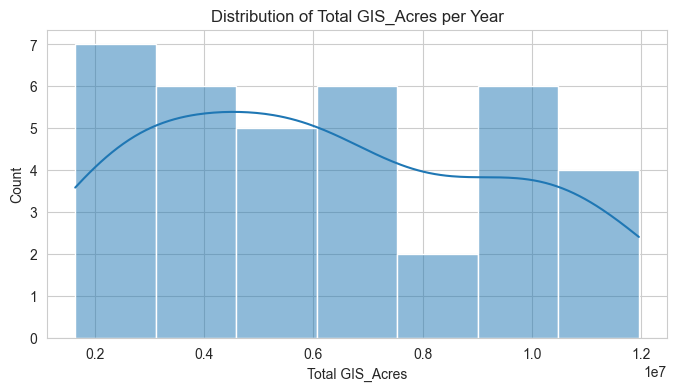

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total GIS_Acres by Fire_Year (1985–2020)
yearly_data = df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()
yearly_data = yearly_data[(yearly_data['Fire_Year'] >= 1985) & (yearly_data['Fire_Year'] <= 2020)]

# Check distribution
print("Yearly GIS_Acres Summary:")
print(yearly_data['GIS_Acres'].describe())
plt.figure(figsize=(8, 4))
sns.histplot(yearly_data['GIS_Acres'], kde=True)
plt.title('Distribution of Total GIS_Acres per Year')
plt.xlabel('Total GIS_Acres')
plt.show()

In [43]:
# Log-transform GIS_Acres (add 1 to avoid log(0))
yearly_data['Log_GIS_Acres'] = np.log1p(yearly_data['GIS_Acres'])


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features (exclude GIS_Acres and Log_GIS_Acres)
X = yearly_data.drop(columns=['GIS_Acres', 'Log_GIS_Acres']).values
y = yearly_data['Log_GIS_Acres'].values  # Use log-transformed target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression (Log-Transformed):")
print(f"R²: {lr_r2:.2f}")
print(f"MSE: {lr_mse:.2f}")

# --- Polynomial Regression (Degree 2) ---
poly = PolynomialFeatures(degree=2)
polyreg = make_pipeline(poly, LinearRegression())
polyreg.fit(X_train, y_train)
poly_pred = polyreg.predict(X_test)
poly_r2 = r2_score(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
print("\nPolynomial Regression (Degree 2, Log-Transformed):")
print(f"R²: {poly_r2:.2f}")
print(f"MSE: {poly_mse:.2f}")

# --- XGBoost Regressor ---
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print("\nXGBoost Regressor (Log-Transformed):")
print(f"R²: {xgb_r2:.2f}")
print(f"MSE: {xgb_mse:.2f}")

Linear Regression (Log-Transformed):
R²: 0.58
MSE: 0.18

Polynomial Regression (Degree 2, Log-Transformed):
R²: 0.51
MSE: 0.21

XGBoost Regressor (Log-Transformed):
R²: 0.02
MSE: 0.42


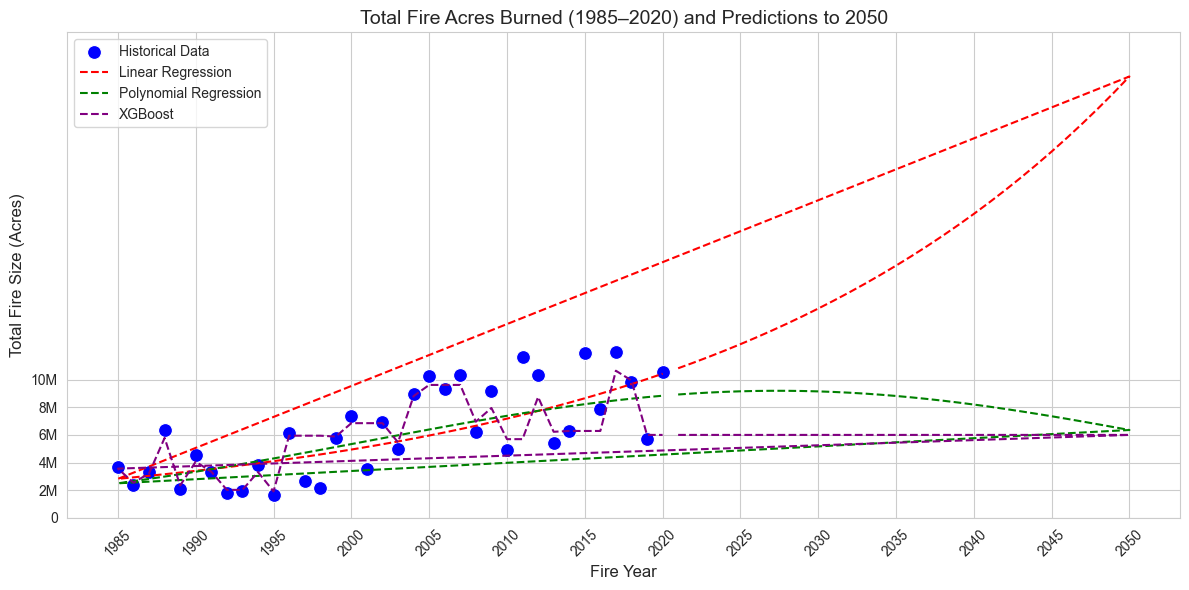

Predictions for 2030, 2040, 2050:
    Year  Linear_Pred_Acres  Poly_Pred_Acres  XGB_Pred_Acres
9   2030       1.513068e+07     9.144593e+06       5998450.0
19  2040       2.197196e+07     8.194016e+06       5998450.0
29  2050       3.190650e+07     6.353299e+06       5998450.0


In [45]:
# Create future years (2021–2050)
future_years = pd.DataFrame({'Fire_Year': range(2021, 2051)})
# Use mean values for cause and type features
mean_features = yearly_data.drop(columns=['Fire_Year', 'GIS_Acres', 'Log_GIS_Acres']).mean()
future_data = pd.concat([future_years.assign(**mean_features), yearly_data.drop(columns=['GIS_Acres', 'Log_GIS_Acres'])], ignore_index=True)

# Prepare X for all years
X_all = future_data.values

# Predict log-transformed values and convert back to acres
lr_future_pred = np.expm1(lr_model.predict(X_all))  # Inverse of log1p
poly_future_pred = np.expm1(polyreg.predict(X_all))
xgb_future_pred = np.expm1(xgb_model.predict(X_all))

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fire_Year', y='GIS_Acres', data=yearly_data, s=100, color='blue', label='Historical Data')
plt.plot(future_data['Fire_Year'], lr_future_pred, color='red', linestyle='--', label='Linear Regression')
plt.plot(future_data['Fire_Year'], poly_future_pred, color='green', linestyle='--', label='Polynomial Regression')
plt.plot(future_data['Fire_Year'], xgb_future_pred, color='purple', linestyle='--', label='XGBoost')

# Customize plot
plt.title('Total Fire Acres Burned (1985–2020) and Predictions to 2050', fontsize=14)
plt.xlabel('Fire Year', fontsize=12)
plt.ylabel('Total Fire Size (Acres)', fontsize=12)
plt.ylim(0, max(yearly_data['GIS_Acres'].max(), lr_future_pred.max(), poly_future_pred.max(), xgb_future_pred.max()) * 1.1)
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000], ['0', '2M', '4M', '6M', '8M', '10M'])
plt.xticks(rotation=45, ticks=range(1985, 2051, 5))
plt.legend()

plt.tight_layout()
plt.show()

# Save predictions
predictions = pd.DataFrame({
    'Year': future_data['Fire_Year'],
    'Linear_Pred_Acres': lr_future_pred,
    'Poly_Pred_Acres': poly_future_pred,
    'XGB_Pred_Acres': xgb_future_pred
})
print("Predictions for 2030, 2040, 2050:")
print(predictions[predictions['Year'].isin([2030, 2040, 2050])])

# Fire Size Based on Year

Overall, we can find a small correlation between fire size as time progresses for the cumulative amount of acres burned per year. Generally, we can come to a semi confident conclusion that as time has progressed, the cumulative number of acres burned has increased. However, the correlation is weak and as such, somewhat meaningless, even after utilizing several different machine learning techniques. Additionally, it's important to make note of the idea that as technology has improved and additional tracking metrics and procedures have been implemented, the number of reported fires has increased, and the methods used to track the amount of acreage burned has improved as well. With this said, this outcome is somewhat predictable. With this, we can introduce dimensionality utilizing an additional dataset focusing on percipitation number for each year.

Ultimately, as a basic Portfolio project, this Notebook is primarily to be referenced as a short example of cleaning data, finding a model that best fits the data, addressing changes in technology and tracking of fires, and training a model to observe the potential future of wildfires over the next 25 years in the US. 